# Perceptron Algorithm from Scratch

This notebook implements the **Perceptron learning algorithm** from scratch using only NumPy — no sklearn for the core logic.

The Perceptron is one of the earliest supervised learning algorithms. It updates weights iteratively based on misclassified points, making it a great foundation for understanding how neural networks learn.

### What this notebook covers
- Manual weight update loop (the core perceptron rule)
- Training on **linearly separable** data — convergence guaranteed by the Perceptron Convergence Theorem
- Training on **linearly inseparable** data — demonstrates the algorithm's fundamental limitation
- Visualising the decision boundary and misclassification curve per epoch
- Comparing the manual implementation against `sklearn`'s `Perceptron`

### Data
Two CSV files are required:
- `linearly_separable_data.csv` — 3 columns: Feature 1, Feature 2, Label (0 or 1)
- `linearly_inseparable_data.csv` — same format

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

## Part 1: Linearly Separable Data

For linearly separable data, the **Perceptron Convergence Theorem** guarantees the algorithm will find a perfect decision boundary in a finite number of steps. We track misclassifications per epoch to observe convergence.

In [ ]:
uploaded = files.upload()
linear_separable_data = pd.read_csv('linearly_separable_data.csv', header=None)
linear_separable_data = linear_separable_data.apply(pd.to_numeric, errors='coerce')
linear_separable_data = linear_separable_data.dropna().reset_index(drop=True)

Saving linearly_separable_data.csv to linearly_separable_data (2).csv


In [ ]:
x1 = linear_separable_data.iloc[:, 0]
x2 = linear_separable_data.iloc[:, 1]
weight = [0, 0]
iteration = 30
misclassification_by_iteration = []
for i in range(iteration):
    over_misclassification, under_misclassification = 0, 0
    for a in range(len(x1)):
        if (weight[0] * x1[a] + weight[1] * x2[a]) > 0 and linear_separable_data.iloc[a, 2] == 0:
            weight[0] -= x1[a]
            weight[1] -= x2[a]
            over_misclassification += 1
        elif (weight[0] * x1[a] + weight[1] * x2[a]) <= 0 and linear_separable_data.iloc[a, 2] == 1:
            weight[0] += x1[a]
            weight[1] += x2[a]
            under_misclassification += 1
    total_misclassification = under_misclassification + over_misclassification
    misclassification_by_iteration.append(total_misclassification)

print(f"Final weights: {weight}")
print(f"Final misclassifications: {misclassification_by_iteration[-1]}")

Final weights: [np.float64(-4.1), np.float64(7.100000000000001)]
Final misclassifications: 0


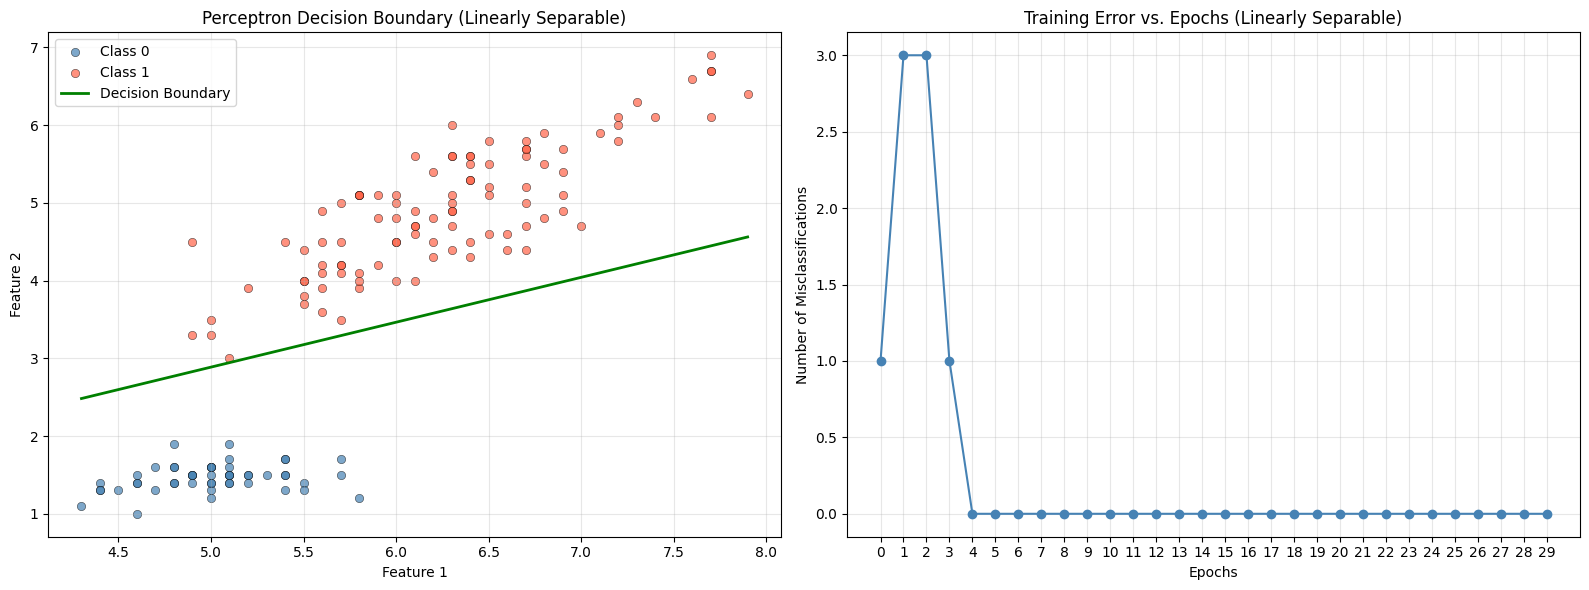

In [ ]:
# Plot decision boundary and training error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Decision boundary
ax1.scatter(x1[linear_separable_data.iloc[:, 2] == 0],
            x2[linear_separable_data.iloc[:, 2] == 0],
            color='steelblue', label='Class 0', alpha=0.7, edgecolors='k', linewidths=0.4)
ax1.scatter(x1[linear_separable_data.iloc[:, 2] == 1],
            x2[linear_separable_data.iloc[:, 2] == 1],
            color='tomato', label='Class 1', alpha=0.7, edgecolors='k', linewidths=0.4)
decision_boundary_x1 = np.linspace(min(x1), max(x1), 100)
decision_boundary_x2 = -(weight[0] / weight[1]) * decision_boundary_x1
ax1.plot(decision_boundary_x1, decision_boundary_x2, color='green', linewidth=2, label='Decision Boundary')
ax1.set_title('Perceptron Decision Boundary (Linearly Separable)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(alpha=0.3)

# Training error curve
iteration_times = np.arange(iteration)
ax2.plot(iteration_times, misclassification_by_iteration, marker='o', color='steelblue', linewidth=1.5)
ax2.set_title('Training Error vs. Epochs (Linearly Separable)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Number of Misclassifications')
ax2.set_xticks(iteration_times)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Part 2: Linearly Inseparable Data

When classes cannot be separated by a straight line, the perceptron **never converges** — it keeps oscillating indefinitely. This is precisely what motivated the development of multi-layer neural networks.

Notice how the misclassification curve fluctuates rather than dropping to zero.

In [ ]:
# Upload and load linearly inseparable data
uploaded_1 = files.upload()
linearly_inseparable_data = pd.read_csv('linearly_inseparable_data.csv', header=None)
linearly_inseparable_data = linearly_inseparable_data.apply(pd.to_numeric, errors='coerce')
linearly_inseparable_data = linearly_inseparable_data.dropna().reset_index(drop=True)

Saving linearly_inseparable_data.csv to linearly_inseparable_data (1).csv


In [ ]:
# Extract features and set initial weights
x1_inseparable = linearly_inseparable_data.iloc[:, 0]
x2_inseparable = linearly_inseparable_data.iloc[:, 1]
weight_inseparable = [1, -3]
iteration_inseparable = 100
misclassification_by_iteration_inseparable = []

# Perceptron training — more epochs to show oscillation
for i in range(iteration_inseparable):
    over_misclassification_inseparable, under_misclassification_inseparable = 0, 0
    for a in range(len(x1_inseparable)):
        predict_y = weight_inseparable[0] * x1_inseparable[a] + weight_inseparable[1] * x2_inseparable[a]
        if predict_y > 0 and linearly_inseparable_data.iloc[a, 2] == 0:
            weight_inseparable[0] -= x1_inseparable[a]
            weight_inseparable[1] -= x2_inseparable[a]
            over_misclassification_inseparable += 1
        elif predict_y <= 0 and linearly_inseparable_data.iloc[a, 2] == 1:
            weight_inseparable[0] += x1_inseparable[a]
            weight_inseparable[1] += x2_inseparable[a]
            under_misclassification_inseparable += 1
    total_misclassification_inseparable = over_misclassification_inseparable + under_misclassification_inseparable
    misclassification_by_iteration_inseparable.append(total_misclassification_inseparable)

print(f"Final weights: {weight_inseparable}")
print(f"Final misclassifications: {misclassification_by_iteration_inseparable[-1]}")

Final weights: [np.float64(0.7145777822380938), np.float64(-0.5613035569680758)]
Final misclassifications: 39


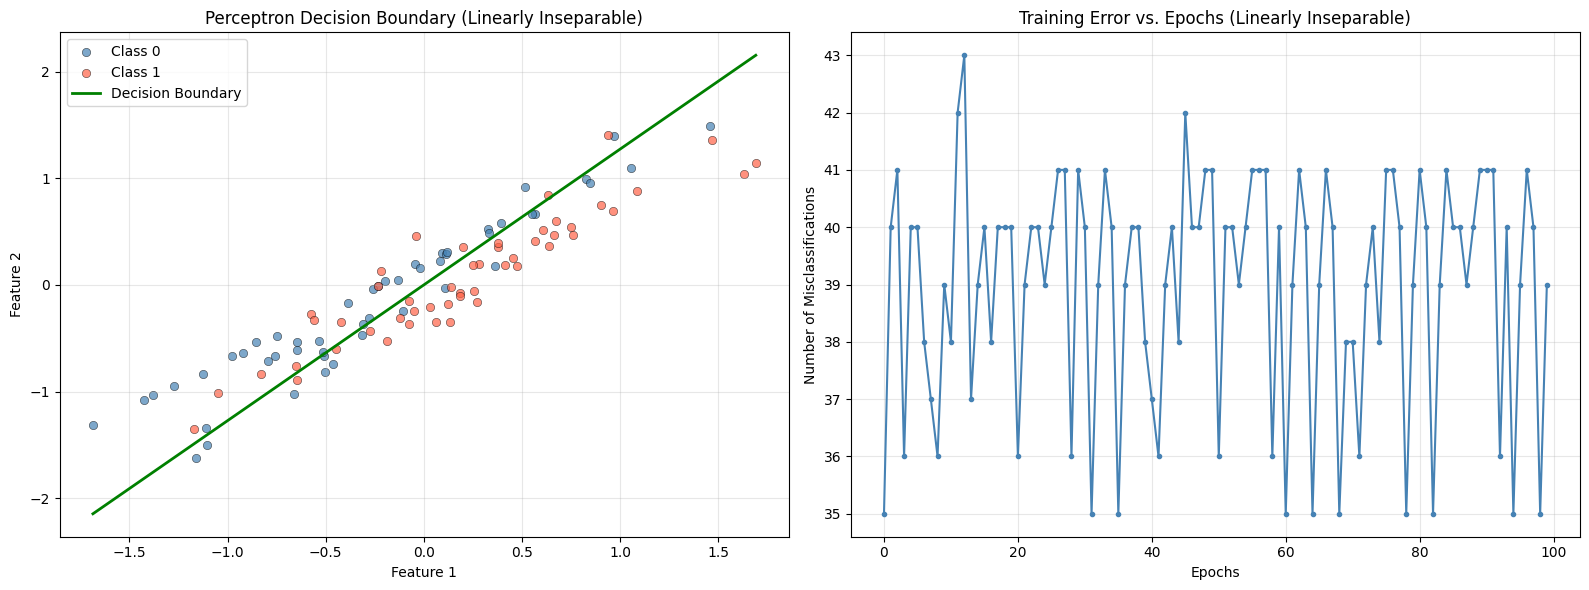

In [ ]:
# Plot decision boundary and training error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Decision boundary
ax1.scatter(x1_inseparable[linearly_inseparable_data.iloc[:, 2] == 0],
            x2_inseparable[linearly_inseparable_data.iloc[:, 2] == 0],
            color='steelblue', label='Class 0', alpha=0.7, edgecolors='k', linewidths=0.4)
ax1.scatter(x1_inseparable[linearly_inseparable_data.iloc[:, 2] == 1],
            x2_inseparable[linearly_inseparable_data.iloc[:, 2] == 1],
            color='tomato', label='Class 1', alpha=0.7, edgecolors='k', linewidths=0.4)
decision_boundary_x1_inseparable = np.linspace(min(x1_inseparable), max(x1_inseparable), 100)
decision_boundary_x2_inseparable = -(weight_inseparable[0] / weight_inseparable[1]) * decision_boundary_x1_inseparable
ax1.plot(decision_boundary_x1_inseparable, decision_boundary_x2_inseparable,
         color='green', linewidth=2, label='Decision Boundary')
ax1.set_title('Perceptron Decision Boundary (Linearly Inseparable)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.grid(alpha=0.3)

# Training error curve
iteration_times_inseparable = np.arange(iteration_inseparable)
ax2.plot(iteration_times_inseparable, misclassification_by_iteration_inseparable,
         marker='o', color='steelblue', linewidth=1.5, markersize=3)
ax2.set_title('Training Error vs. Epochs (Linearly Inseparable)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Number of Misclassifications')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Part 3: Comparison with sklearn's Perceptron

We verify our manual implementation by comparing its decision boundary against sklearn's `Perceptron` on the separable dataset.

In [ ]:
# Prepare data for sklearn
X = linear_separable_data.iloc[:, :2].values
y = linear_separable_data.iloc[:, 2].values

# Fit sklearn Perceptron
sk_perceptron = Perceptron(max_iter=30, tol=None)
sk_perceptron.fit(X, y)

sk_weight = sk_perceptron.coef_[0]
sk_intercept = sk_perceptron.intercept_[0]

print(f"sklearn accuracy:               {sk_perceptron.score(X, y):.2%}")
print(f"sklearn weights:               {sk_weight}")
print(f"Manual final misclassifications: {misclassification_by_iteration[-1]}")

sklearn accuracy:               100.00%
sklearn weights:               [-2.2  5.2]
Manual final misclassifications: 0


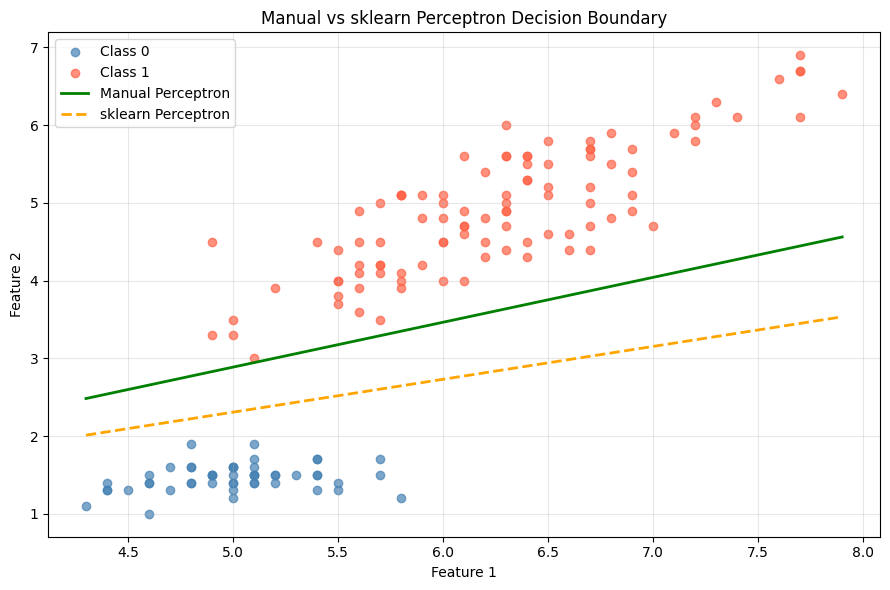

In [ ]:
# Compare decision boundaries
fig, ax = plt.subplots(figsize=(9, 6))

ax.scatter(x1[linear_separable_data.iloc[:, 2] == 0],
           x2[linear_separable_data.iloc[:, 2] == 0],
           color='steelblue', label='Class 0', alpha=0.7)
ax.scatter(x1[linear_separable_data.iloc[:, 2] == 1],
           x2[linear_separable_data.iloc[:, 2] == 1],
           color='tomato', label='Class 1', alpha=0.7)

x1_line = np.linspace(min(x1), max(x1), 200)

# Manual boundary
if weight[1] != 0:
    ax.plot(x1_line, -(weight[0] / weight[1]) * x1_line,
            color='green', linewidth=2, label='Manual Perceptron')

# sklearn boundary (includes intercept)
if sk_weight[1] != 0:
    ax.plot(x1_line, -(sk_weight[0] * x1_line + sk_intercept) / sk_weight[1],
            color='orange', linewidth=2, linestyle='--', label='sklearn Perceptron')

ax.set_title('Manual vs sklearn Perceptron Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

| | Linearly Separable | Linearly Inseparable |
|---|---|---|
| Convergence | ✅ Guaranteed | ❌ Never converges |
| Final errors | 0 | Oscillates |
| Decision boundary | Stable | Keeps shifting |

The perceptron's failure on non-linearly separable data was a key motivation for multi-layer neural networks and non-linear activation functions — the foundation of modern deep learning.